In [1]:
from IPython.display import display, Markdown
markdown_content = """
# Email Classifer using SVM
"""
display(Markdown(markdown_content))


# Email Classifer using SVM


In [2]:
markdown_content = """
## 1.Import library and read file csv
"""
display(Markdown(markdown_content))


## 1.Import library and read file csv


In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
ps = PorterStemmer()
df = pd.read_csv('../data/tfidf_output_cleaned.csv')
df_copy = df.copy()
df_copy

,Label,Message,imp_feature
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5155,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5156,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5157,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5158,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [4]:
markdown_content = """
## 2.Split data into 2 parts to train and test
"""
display(Markdown(markdown_content))


## 2.Split data into 2 parts to train and test


In [5]:
from sklearn.model_selection import train_test_split
X = df_copy['imp_feature']
y = df_copy['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((3870,), (1290,), (3870,), (1290,))

In [6]:
markdown_content = """
## 3.Model
"""
display(Markdown(markdown_content))


## 3.Model


In [7]:
markdown_content = """
### 3.Build Model
"""
display(Markdown(markdown_content))


### 3.Build Model


In [8]:
print(X_train)

2167                                check head drop stuff
3862    hiya u like hlday pic look horribl took mo how...
1424                      sent email address incomm right
326     call germani 1 penc per minut call fix line vi...
604                                 call said choos futur
                              ...                        
4426    weekli tone readi download week new tone inclu...
466                 ok gon na head usf like fifteen minut
3092    moon come color dream star make music sm give ...
3772    u gd lor go shop got stuff u wan 2 watch infer...
860     remind download content alreadi paid goto http...
Name: imp_feature, Length: 3870, dtype: object


In [9]:
tfidf = TfidfVectorizer()
feature = tfidf.fit_transform(X_train)
tuned_parameters = {'kernel':['linear','rbf'],'gamma':[1e-3,1e-4], 'C':[1,10,100,1000]}
model = GridSearchCV(svm.SVC(),tuned_parameters)
model.fit(feature, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [10]:
markdown_content = """
### 3.Check spam
"""
display(Markdown(markdown_content))


### 3.Check spam


In [11]:
def check_spam(text):
    email_new = [text]
    email_tfidf = tfidf.transform(email_new)
    prediction = model.predict(email_tfidf)
    if prediction[0] == 1:
        print("Email này là spam.")
    else:
        print("Email này không phải là spam.")

In [12]:
email = "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize."
print(check_spam(email))

Email này là spam.
None


In [13]:
markdown_content = """
### 4.Get predict and evaluate the model
"""
display(Markdown(markdown_content))


### 4.Get predict and evaluate the model


Precision :  0.9642857142857143
Recall :  0.8709677419354839
Accuracy Score :  0.9806201550387597
F1 Score :  0.9152542372881356

 [[1130    5]
 [  20  135]]



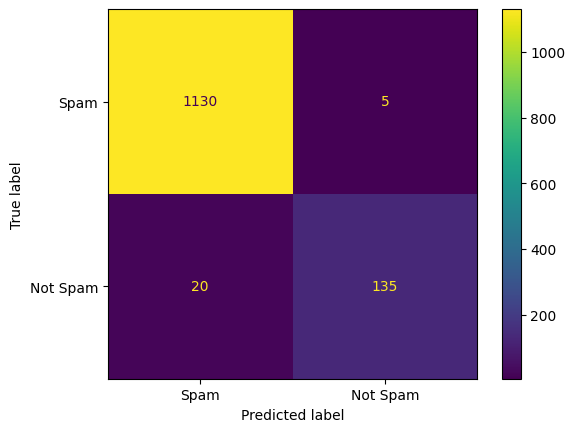

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,ConfusionMatrixDisplay, confusion_matrix
x_test = tfidf.transform(X_test)
x_pred = model.predict(x_test)

def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Spam', 'Not Spam'] )
    cm_display.plot()


perform(x_pred)